# Data PreProcessing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importing packagesimport pandas as pd
import pandas as pd
import csv
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
##Loading csv files
path = r'/content/drive/MyDrive/ColabNotebooks/Lisboa_Estancia/IMU_Trials/all_IMUsamples_final.csv'

df= pd.read_csv(path, skiprows=1, usecols=[0,1,2,3,4,5,6], names=['x1', 'y1', 'z1','x2', 'y2', 'z2','label'])
print (df.info)
print(df.shape)

#label outputs (y) Activities
y = pd.read_csv(path, usecols= [6])
print("y = \n",y)
print(y.shape)

#Standarizing
x = []
scaler = StandardScaler()
x = scaler.fit_transform(df)
x = pd.DataFrame(data = df, columns = ['x1','y1','z1','x2','y2','z2'])
print("x = \n",x)
print(x.shape)

#Verifying data shape
x.shape, y.shape   

#Counting number of samples per activity
y['label'].value_counts()

<bound method DataFrame.info of            x1     y1     z1     x2     y2     z2  label
0       0.542 -1.177 -0.796 -2.141  2.420 -1.393      1
1       0.536 -1.231 -0.780 -2.466 -0.073 -1.819      1
2       0.516 -1.246 -0.779 -0.516 -2.029 -0.664      1
3       0.499 -1.239 -0.787  0.035 -0.993 -1.221      1
4       0.475 -1.207 -0.797 -1.330 -0.199 -2.408      1
...       ...    ...    ...    ...    ...    ...    ...
380264 -0.090 -0.068 -0.091 -0.088  0.036 -0.048      3
380265 -0.085 -0.069 -0.079 -0.088  0.036 -0.048      3
380266 -0.078 -0.073 -0.064 -0.088  0.036 -0.048      3
380267 -0.080 -0.079 -0.059 -0.088  0.036 -0.048      3
380268 -0.092 -0.083 -0.069 -0.088  0.036 -0.048      3

[380269 rows x 7 columns]>
(380269, 7)
y = 
         label
0           1
1           1
2           1
3           1
4           1
...       ...
380264      3
380265      3
380266      3
380267      3
380268      3

[380269 rows x 1 columns]
(380269, 1)
x = 
            x1     y1     z1     x2   

1    135371
2    128587
3    116311
Name: label, dtype: int64

## Create train and test subdatasets

In [4]:
import tensorflow as tf
### Convert labels from [1,2,3] to [0,1,2]  Do it just in case the values starts in 1.
y = y - 1
print(y)


        label
0           0
1           0
2           0
3           0
4           0
...       ...
380264      2
380265      2
380266      2
380267      2
380268      2

[380269 rows x 1 columns]


In [5]:
from sklearn.model_selection import train_test_split
import numpy as np
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(304215, 6) (76054, 6)
(304215, 1) (76054, 1)


## Graphics

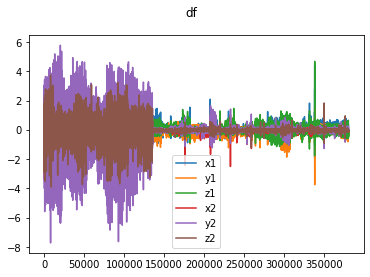

Loaded 380269 subjects


In [6]:
name = 'df'
columns_names = ['x1','y1','z1','x2','y2','z2']
#plt.plot(df[name])
plt.plot(x)
plt.suptitle(name)
plt.legend(columns_names)
plt.show()

# plot the x, y, z acceleration and activities for multiple subjects
def plot_subject(subject):
	plt.figure()
	# create a plot for each column
	for col in range(subject.shape[0]):
		plt.subplot(subject.shape[0], 1, col+1)
		plt.plot(subject[:,col])
	plt.show()

# load
subjects = df
print('Loaded %d subjects' % len(subjects))


#Sliding Window Proccessing

In [7]:
print(df.head())
print(df.shape)
#df.loc[3,"y2"]
#df.loc[2:4]
#print(df.loc[2:4])

dataset_size = df.shape[0] ### how many rows
window_size = 100 ### how many time steps we want to process simultaneously

xx = np.array([ x.loc[i:(i+window_size-1)].values for i in range(dataset_size-window_size) ])
#print(xx[0:5]).loc
print("shape(xx) = ", xx.shape)

yy = np.array([ y.loc[i].values for i in range(dataset_size-window_size) ])
print("shape(yy) = ", yy.shape)

#yy = np.array([ y.loc[i:(i+window_size-1)].values for i in range(dataset_size-window_size) ])
#print(yy[0:5])
#print("shape(yy) = ", yy.shape)
#yy[2].shape
#yy.reshape(-1,2)

      x1     y1     z1     x2     y2     z2  label
0  0.542 -1.177 -0.796 -2.141  2.420 -1.393      1
1  0.536 -1.231 -0.780 -2.466 -0.073 -1.819      1
2  0.516 -1.246 -0.779 -0.516 -2.029 -0.664      1
3  0.499 -1.239 -0.787  0.035 -0.993 -1.221      1
4  0.475 -1.207 -0.797 -1.330 -0.199 -2.408      1
(380269, 7)
shape(xx) =  (380169, 100, 6)
shape(yy) =  (380169, 1)


In [8]:
from sklearn.model_selection import train_test_split
import numpy as np
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)
X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size = 0.2)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(304135, 100, 6) (76034, 100, 6)
(304135, 1) (76034, 1)


# **LSTM Architecture**

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               42800     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 303       
Total params: 53,203
Trainable params: 53,203
Non-trainable params: 0
_________________________________________________________________
None


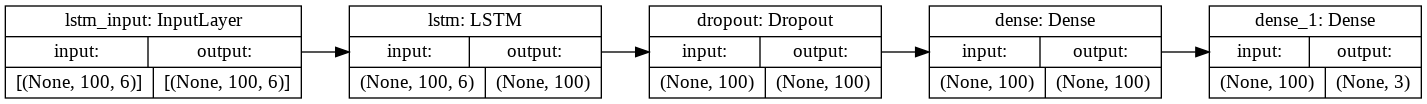

In [9]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout,LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam

input_dim = X_train.shape[1:] # number of columns/variables/features : 2x3 = 6
# n_classes = 6 creo que me equivoqué
n_classes = 3
#input_dim = X_train.shape[2] # number of columns/variables/features : 2x3 = 6
#timesteps= X_train.shape[1]
#n_outputs = np.unique(y_train).shape[0]

#print("input_dim = ", input_dim)
##print("num_classes = ", n_outputs)

### https://www.tensorflow.org/api_docs/python/tf/keras/losses
# loss_function = 'sparse_categorical_crossentropy'

### https://www.tensorflow.org/api_docs/python/tf/keras/metrics
# score_function = 'sparse_categorical_accuracy'

### https://www.tensorflow.org/api_docs/python/tf/keras/activations
# activation_function = 'relu'

### https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
# optimizer_function = 'adam'

verbose, epochs, batch_size = 1, 15, 64

model = Sequential()
model.add(LSTM(100, input_shape=(input_dim)))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))
	
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])
plot = tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, rankdir='LR')
print(model.summary())
plot


In [10]:
# fit network
#model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
start_time = time.perf_counter()

result = model.fit(X_train, y_train, epochs=epochs, verbose=1, batch_size=batch_size, validation_data=(X_test, y_test))

end_time = time.perf_counter()
run_time = (end_time - start_time)
print( "time = " + str(int(run_time)) + " s = " + str(int(run_time//60)) + " mins" )

Epoch 1/15
4753/4753 [==============================] - 450s 94ms/step - loss: 0.6515 - sparse_categorical_accuracy: 0.6884 - val_loss: 0.3070 - val_sparse_categorical_accuracy: 0.8915
Epoch 2/15
4753/4753 [==============================] - 463s 97ms/step - loss: 0.2851 - sparse_categorical_accuracy: 0.9017 - val_loss: 0.2107 - val_sparse_categorical_accuracy: 0.9306
Epoch 3/15
4753/4753 [==============================] - 491s 103ms/step - loss: 0.2028 - sparse_categorical_accuracy: 0.9326 - val_loss: 0.1568 - val_sparse_categorical_accuracy: 0.9449
Epoch 4/15
4753/4753 [==============================] - 487s 102ms/step - loss: 0.1715 - sparse_categorical_accuracy: 0.9423 - val_loss: 0.1394 - val_sparse_categorical_accuracy: 0.9519
Epoch 5/15
4753/4753 [==============================] - 481s 101ms/step - loss: 0.1339 - sparse_categorical_accuracy: 0.9526 - val_loss: 0.1145 - val_sparse_categorical_accuracy: 0.9554
Epoch 6/15
4753/4753 [==============================] - 478s 101ms/step 

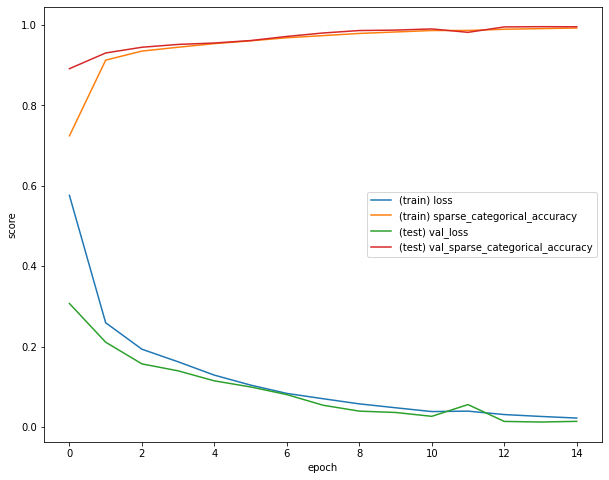

In [11]:
datafolder = '/content/drive/MyDrive/ColabNotebooks/Lisboa_Estancia/IMU_Trials/'
fig = plt.figure(figsize=[10,8])
ax = fig.add_subplot(111)
for key in result.history :
  #if key == "loss" or key == "val_loss": continue
  label = ("(test) " if key.startswith("val_") else "(train) ") + key
  plt.plot(result.history[key], label=label)
#ax.set(ylim=[-0.1, 1.1])
ax.set(xlabel="epoch", ylabel="score")
ax.legend()
plt.show()
fig.savefig(datafolder + "plot-train_test_loss_metrics_LSTM_1.png")

In [12]:
y_pred = model.predict(X_test)
print(y_pred.shape)
print(y_pred[0:20])
loss_function = 'sparse_categorical_crossentropy'
score_function = 'sparse_categorical_accuracy'
scores = model.evaluate(X_test, y_test)
print(loss_function," = ",scores[0])
print(score_function," = ",scores[1])

(76034, 3)
[[9.9999940e-01 4.8057927e-07 1.5383750e-07]
 [5.1590252e-01 2.3162735e-01 2.5247014e-01]
 [1.0000000e+00 8.3271258e-15 7.5777710e-15]
 [2.9148729e-11 8.2437928e-08 9.9999988e-01]
 [1.8393151e-06 3.3165663e-04 9.9966657e-01]
 [5.4092496e-04 9.9863964e-01 8.1934838e-04]
 [5.3437901e-08 2.2201855e-06 9.9999774e-01]
 [1.6955468e-10 1.0112744e-06 9.9999905e-01]
 [1.0000000e+00 2.4567579e-10 9.7233862e-12]
 [2.0201989e-07 3.4809784e-06 9.9999630e-01]
 [9.5086292e-14 1.5685883e-08 1.0000000e+00]
 [1.0000000e+00 5.5325098e-12 2.3851645e-12]
 [1.0000000e+00 3.8119513e-10 3.8301749e-12]
 [2.0699372e-07 8.2881466e-05 9.9991691e-01]
 [1.9252226e-07 3.9338324e-06 9.9999583e-01]
 [1.0000000e+00 1.0056101e-11 3.8248823e-12]
 [1.0000000e+00 4.0158037e-12 8.9859365e-13]
 [5.4305119e-12 3.6806973e-08 1.0000000e+00]
 [9.9997497e-01 2.1583137e-05 3.4015277e-06]
 [7.8594443e-05 9.9833006e-01 1.5913463e-03]]
2377/2377 [==============================] - 51s 21ms/step - loss: 0.0137 - sparse_categ

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/plot_confusion_matrix.py:59: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdd0e3e6810>)

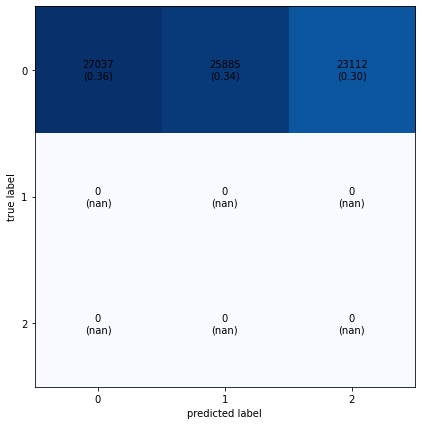

In [13]:
# Confusion matrix
!pip3 install mlxtend
import mlxtend
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import numpy as np

max_test = np.argmax(y_test, axis= -1) 
max_predictions = np.argmax(y_pred, axis = -1) 
mat = confusion_matrix(max_test, max_predictions)
# plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True, figsize=(7,7))
plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(7,7))

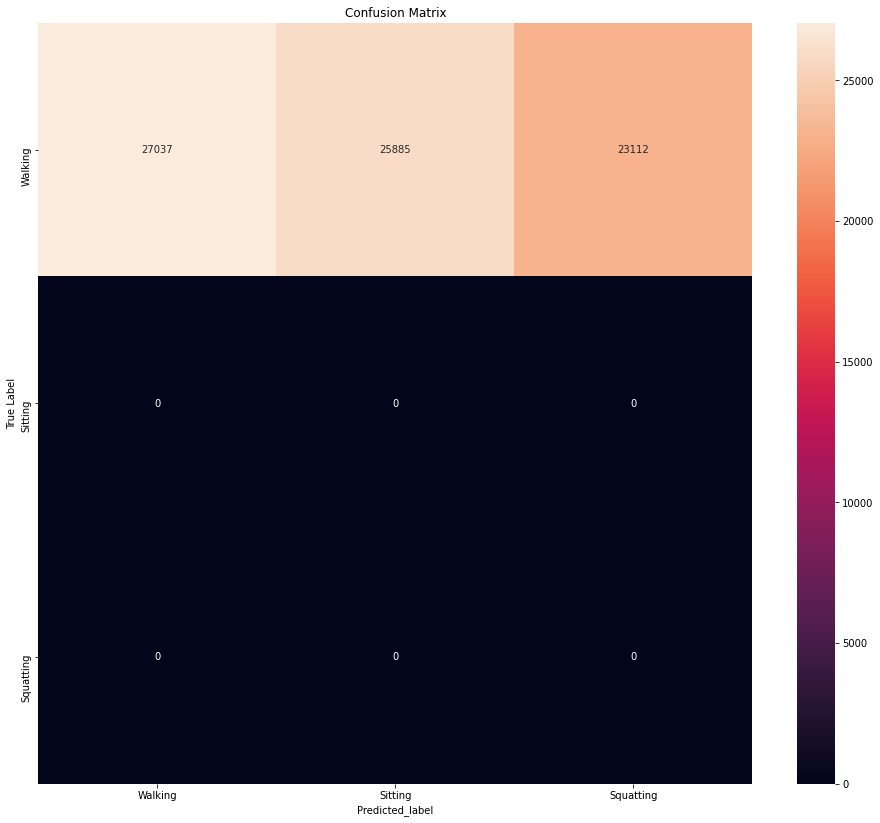

In [14]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

max_test = np.argmax(y_test, axis=1) 
max_predictions = np.argmax(y_pred, axis = 1) 
confusion_matrix = confusion_matrix(max_test, max_predictions)
LABELS = ['Walking', 'Sitting', 'Squatting']

plt.figure(figsize=(16,14)) 
sns.heatmap(confusion_matrix, xticklabels = LABELS, yticklabels = LABELS, annot =True, fmt = "d") 
plt.title("Confusion Matrix") 
plt.xlabel('Predicted_label') 
plt.ylabel('True Label') 
plt.show() 